#**Hope to Skills - Free AI Course**
##**Shifa Zahra Assignment 13**

# **Digit Classification using Convolutional Neural Networks**

In [4]:
# Import required Packages
import numpy as np
import pandas as pd
import keras
import tensorflow as tf

In [5]:
# Checking Available Devices
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4698848435695227106
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3363540001794129924
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


## **Data Splitting**

In [6]:
# Loading Dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

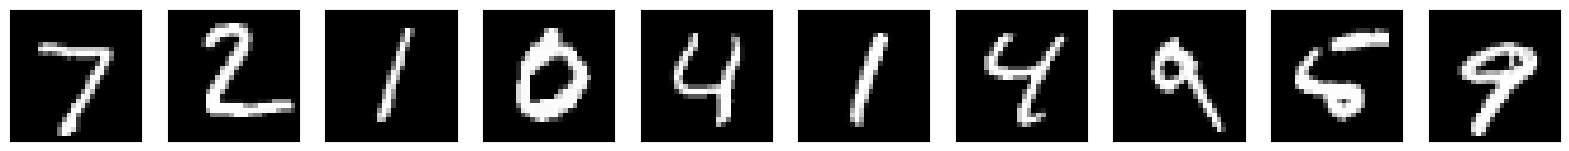

In [7]:
import matplotlib.pyplot as plt

# Number of digits to display
n = 10

# Create a figure to display the images
plt.figure(figsize=(20, 4))

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n, i + 1)

    # Display the original image
    plt.imshow(x_test[i].reshape(28, 28))

    # Set colormap to grayscale
    plt.gray()

    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the figure with the images
plt.show()

# Close the figure
plt.close()


# **Displaying the Shapes of dataset**

In [8]:
#Dataset Shapes
print("x_train Shape :", x_train.shape)
print("y_train Shape :", y_train.shape)
print("x_test Shape :", x_test.shape)
print("y_test Shape :", y_test.shape)

x_train Shape : (60000, 28, 28)
y_train Shape : (60000,)
x_test Shape : (10000, 28, 28)
y_test Shape : (10000,)


# **Reshaping the data**

In [9]:
# Reshaping Data in "Channel Last" format for consumption of Tensorflow backend
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

# **Min Max Scalling**

In [10]:
# converting to floating point and normalizing pixel values in range [0,1]
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

# **One Hot encoding**

In [11]:
# Reshaping Labels in One-hot encoding for Multi-class Classification
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Seeing updated Shapes
print("x_train Shape :", x_train.shape)
print("y_train Shape :", y_train.shape)
print("x_test Shape :", x_test.shape)
print("y_test Shape :", y_test.shape)

x_train Shape : (60000, 28, 28, 1)
y_train Shape : (60000, 10)
x_test Shape : (10000, 28, 28, 1)
y_test Shape : (10000, 10)


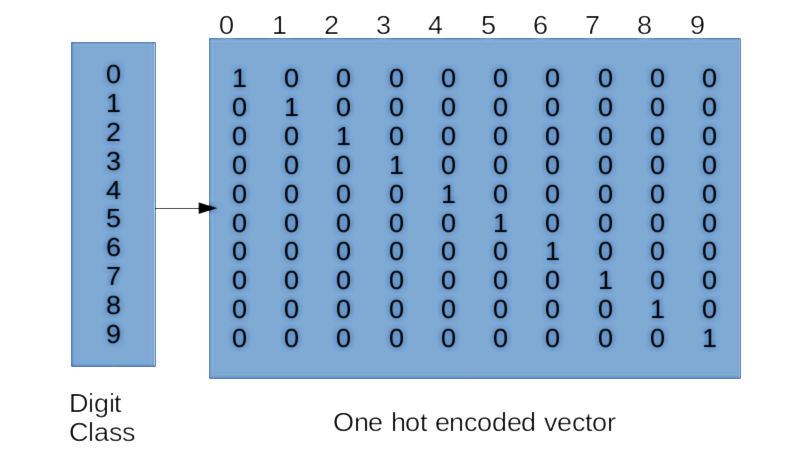

# **Building the CNN**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [13]:
# img_rows, img_cols, channels = 28, 28, 1 # 1 for greyscale images and 3 for rgb images

# classes=10
# Define the dimensions of the input image
img_rows, img_cols, channels = 28, 28, 1  # 1 for greyscale images and 3 for rgb images

# Define the number of filters for each layer of the CNN
filters = [6, 32, 80 ,120]  # These are the number of filters in each layer of the CNN

# Define the number of classes for classification
classes = 10  # This is the number of different categories that the CNN will classify images into


In [14]:
# Creating Model

model=Sequential() #Sequential is a container to store layers
model.add(Conv2D(filters[0],(3,3),padding='same',\
                 activation='relu',input_shape=(img_rows,img_cols, channels)))
model.add(MaxPooling2D(pool_size=(2,2))) #For reducing image size
# (dim+pad-kernel)/2   (28 +3 -3)/2 = 14
model.add(Conv2D(filters[1],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (14 +2 -2)/2 = 7
model.add(Conv2D(filters[2],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (7 +2 -2)/2 = 3
model.add(Conv2D(filters[3],(2,2),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# (dim+pad-kernel)/2   (3 +2 -2)/2 = 1
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## **Convolutional Layer**

# **Pooling layer**

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        800       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 80)          10320     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 80)          0

# **Training the CNN**

In [16]:
# Training Model
model.fit(x_train, y_train, validation_split= 0.2, epochs=15, batch_size=64, verbose=1)
# model.evaluate(x_test, y_test, verbose=2)

Epoch 1/15
750/750 [==============================] - 10s 5ms/step - loss: 1.9859 - accuracy: 0.3627 - val_loss: 0.9266 - val_accuracy: 0.7084
Epoch 2/15
750/750 [==============================] - 4s 6ms/step - loss: 0.5184 - accuracy: 0.8307 - val_loss: 0.2601 - val_accuracy: 0.9174
Epoch 3/15
750/750 [==============================] - 4s 5ms/step - loss: 0.2546 - accuracy: 0.9185 - val_loss: 0.1831 - val_accuracy: 0.9413
Epoch 4/15
750/750 [==============================] - 4s 5ms/step - loss: 0.1771 - accuracy: 0.9448 - val_loss: 0.2324 - val_accuracy: 0.9262
Epoch 5/15
750/750 [==============================] - 4s 5ms/step - loss: 0.1406 - accuracy: 0.9558 - val_loss: 0.1291 - val_accuracy: 0.9584
Epoch 6/15
750/750 [==============================] - 4s 6ms/step - loss: 0.1188 - accuracy: 0.9627 - val_loss: 0.1097 - val_accuracy: 0.9664
Epoch 7/15
750/750 [==============================] - 3s 5ms/step - loss: 0.1029 - accuracy: 0.9674 - val_loss: 0.1029 - val_accuracy: 0.9663
Epoch

# **Testing the Model**

In [17]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(x_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, y_test)
print("\nTest accuracy: {}".format(test_accuracy))



Test accuracy: 0.9733


**The training accuracy is greater than the testing accuracy because the model is evaluated on unseen data during testing, which can lead to lower accuracy compared to the training phase.**

Test accuracy: 0.9733

Training accuracy: 0.9835

In [18]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = x_test[20:40]
actual_labels = y_test[20:40]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)


1/1 [==============================] - 0s 176ms/step


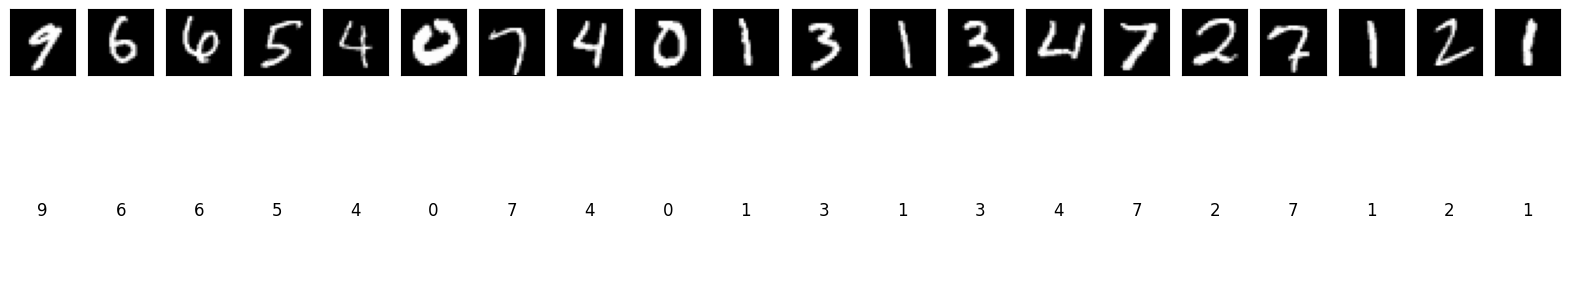

In [19]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()
